# Visualize results

In [5]:
import random
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [6]:
inpath = ""
bootpath = ""
outpath = outpath= ""

In [19]:
results = pd.read_csv(inpath+'merged.csv')
results

,GDP per capita,year,tight,loose,indi,coll,old_care_vir,young_care_vir,old_fare_vir,young_fare_vir,...,old_negative,young_negative,old_warm,young_warm,old_unwarm,young_unwarm,old_competent,young_competent,old_incompetent,young_incompetent
0,799.000,1950,0.002368,0.001413,0.000211,0.000969,0.077528,0.167004,-0.223622,-0.048336,...,0.215519,0.102221,0.262306,0.395518,0.302466,0.244949,0.163599,0.353609,0.529452,0.366059
1,950.000,1951,0.002378,0.001369,0.000195,0.000848,0.065941,0.233189,-0.251721,-0.040441,...,0.167128,0.168900,0.227109,0.415024,0.323790,0.313511,0.115175,0.312196,0.480537,0.372717
2,1047.000,1952,0.002267,0.001430,0.000191,0.000852,0.145695,0.246119,-0.192902,-0.086577,...,0.162285,0.070029,0.298470,0.424860,0.198229,0.103335,0.149534,0.325749,0.437135,0.267225
3,1157.000,1953,0.002150,0.001471,0.000205,0.000830,0.063709,0.236412,-0.230772,-0.046209,...,0.166587,0.093523,0.265670,0.441650,0.299266,0.192502,0.152288,0.379986,0.629433,0.433454
4,1049.000,1954,0.001993,0.001611,0.000205,0.000825,0.059473,0.240752,-0.246282,-0.118399,...,0.260382,0.175968,0.239109,0.427290,0.380084,0.211279,0.114103,0.409148,0.554091,0.359907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,12733.932,2017,0.001599,0.002189,0.001363,0.000678,0.253297,0.333725,-0.243074,-0.057698,...,0.420587,0.303069,0.404546,0.484983,0.625151,0.430354,-0.064763,0.241197,0.551082,0.287992
68,13101.706,2018,0.001547,0.002217,0.001330,0.000702,0.218142,0.331101,-0.231970,-0.038894,...,0.435771,0.285361,0.420808,0.503786,0.594198,0.382162,-0.046556,0.265051,0.522542,0.205119
69,NaN,2019,NaN,NaN,NaN,NaN,0.214937,0.297406,-0.190251,-0.017391,...,0.400159,0.240448,0.305951,0.452567,0.572570,0.313297,-0.165122,0.185019,0.476525,0.148190
70,NaN,2020,NaN,NaN,NaN,NaN,0.223103,0.304240,-0.201197,-0.097526,...,0.468865,0.323435,0.360825,0.496181,0.585490,0.325062,-0.066345,0.228097,0.476105,0.163762


In [7]:
# Use glob to find all files in the directory with the prefix "null_"
file_list = glob.glob(bootpath + "null_*.csv")

# Loop through the list of files and read them into a pandas DataFrame
df_list = []
for file in file_list:
    filename = os.path.basename(file)
    df = pd.read_csv(file)
    df['filename'] = filename
    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
boot_df = pd.concat(df_list, ignore_index=True)

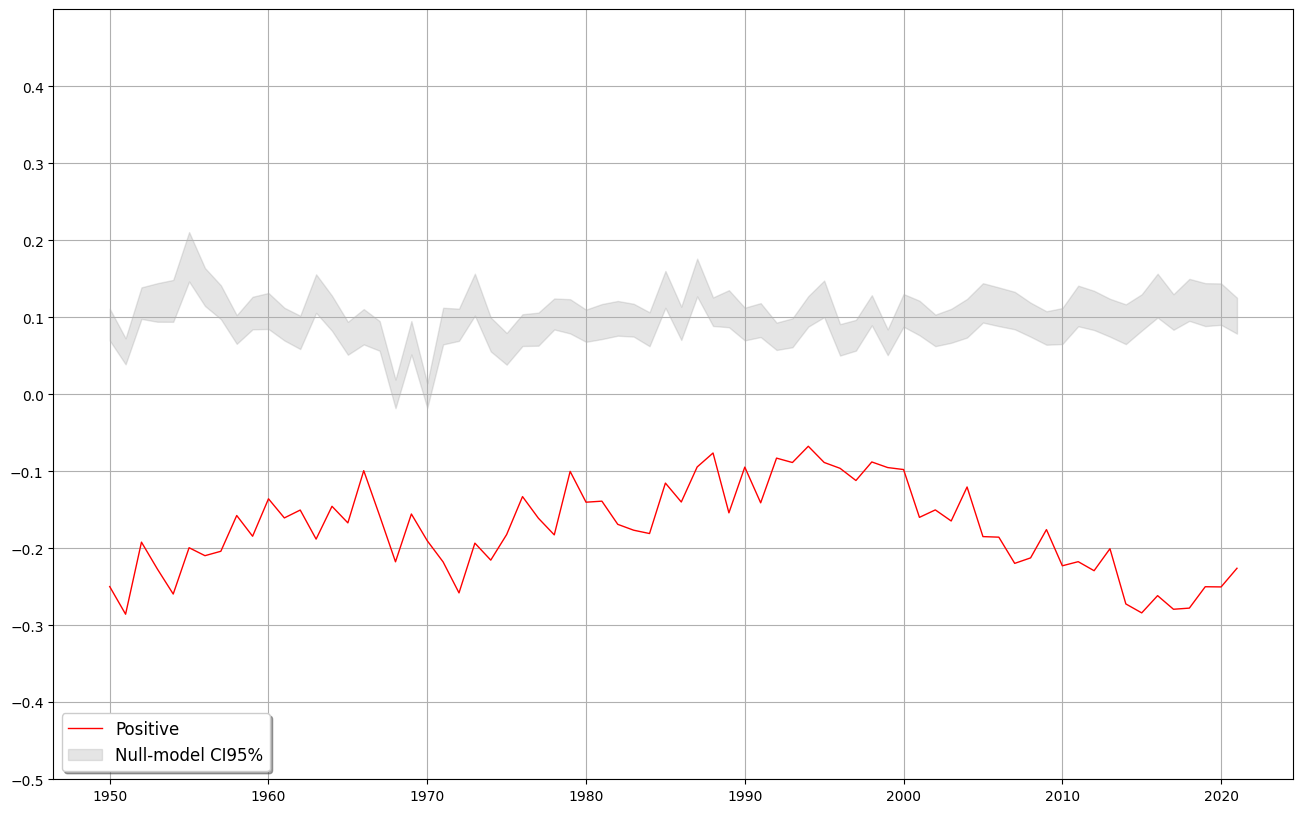

In [27]:
data1 = results
data2 = boot_df[boot_df['filename'] == 'null_pos.csv']
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.plot(data1['year'], data1['old_positive'] - data1['young_positive'], color='red', lw=1, linestyle = 'solid', label='Positive')
# plot the 95% confidence interval as a grey band
ax.fill_between(data2['year'], data2['95percent_lower'], data2['95percent_upper'],
                 color='grey', alpha=0.2, label ='Null-model CI95%')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

fig.savefig(outpath+'positive.png')

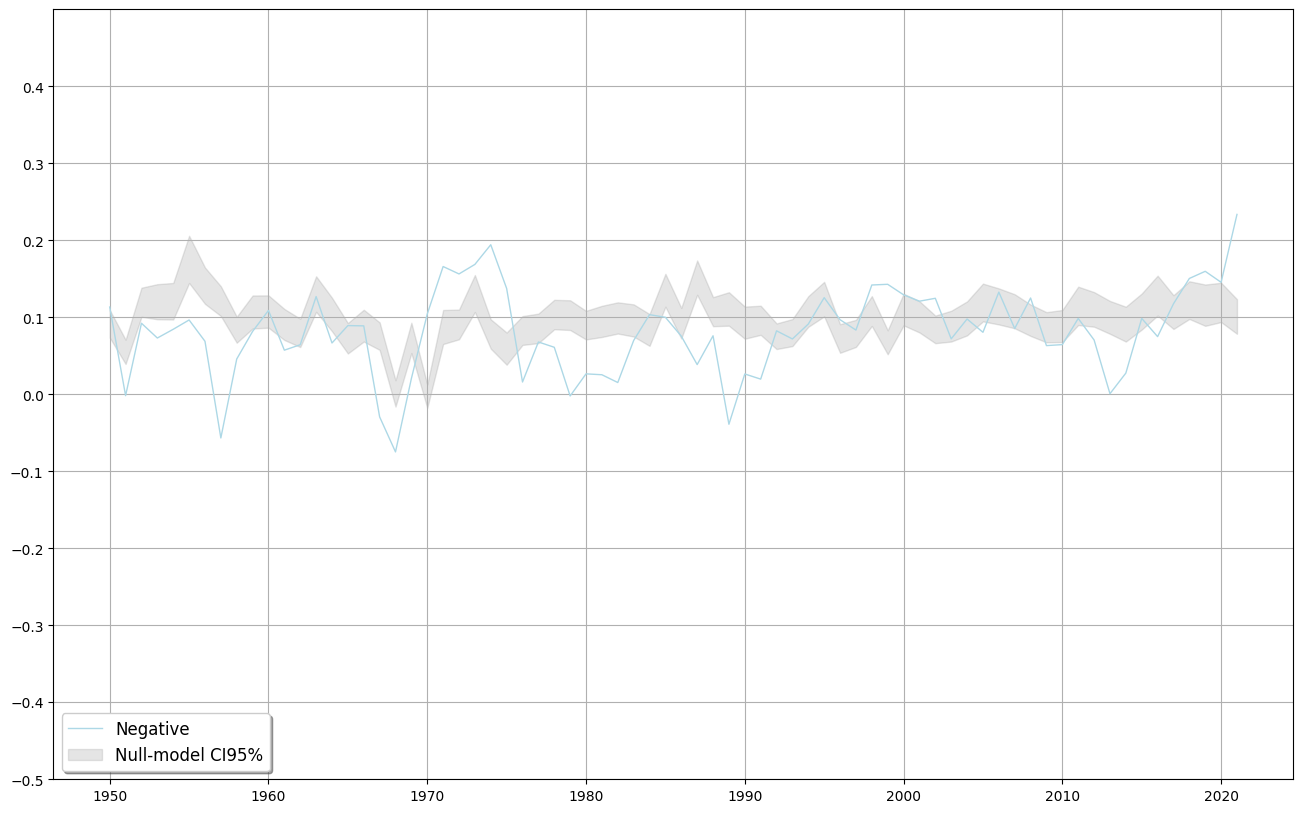

In [28]:
data1 = results
data2 = boot_df[boot_df['filename'] == 'null_neg.csv']
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.plot(data1['year'], data1['old_negative'] - data1['young_negative'], color='lightblue', lw=1, linestyle = 'solid', label='Negative')
# plot the 95% confidence interval as a grey band
ax.fill_between(data2['year'], data2['95percent_lower'], data2['95percent_upper'],
                 color='grey', alpha=0.2, label ='Null-model CI95%')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

fig.savefig(outpath+'negative.png')

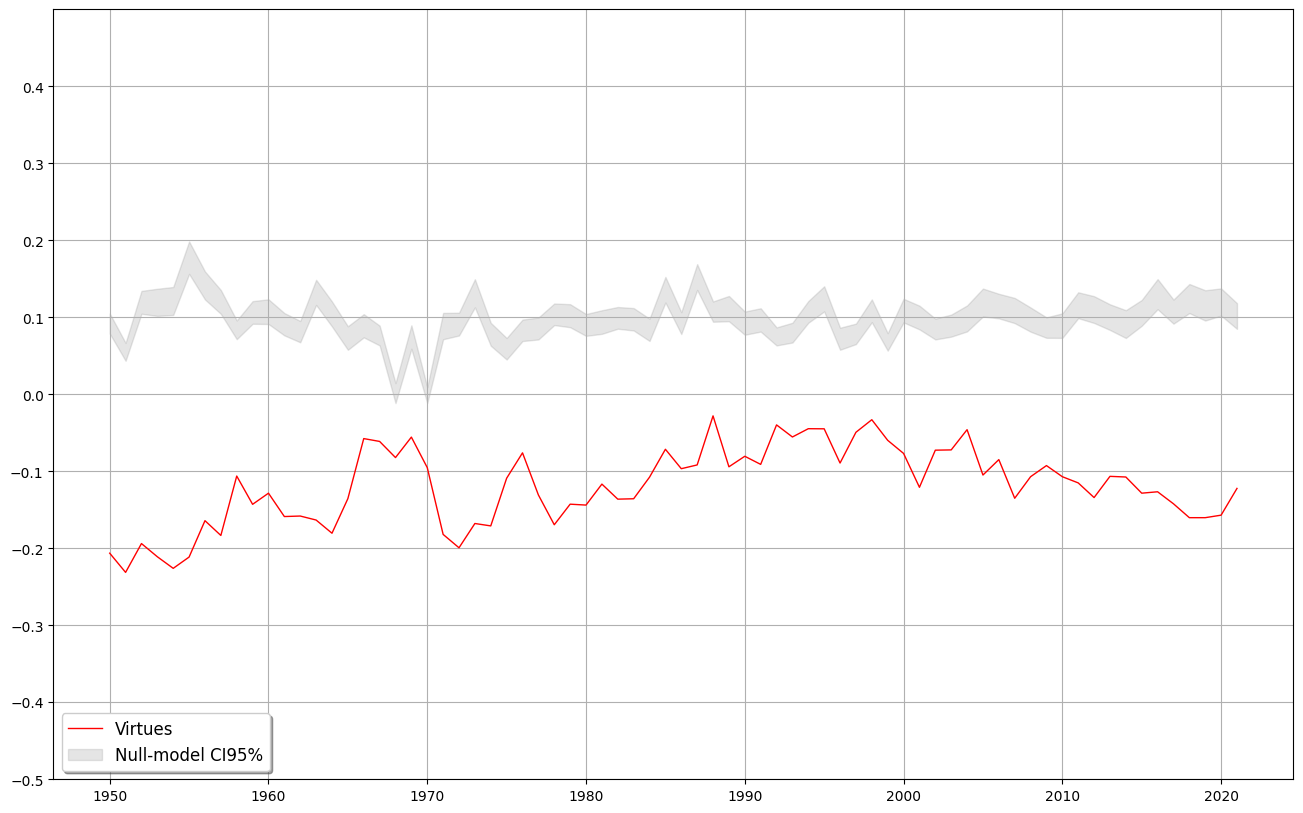

In [31]:
data1 = results
data2 = boot_df[boot_df['filename'] == 'null_vir.csv']
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.plot(data1['year'], data1['old_virtue'] - data1['young_virtue'], color='red', lw=1, linestyle = 'solid', label='Virtues')
# plot the 95% confidence interval as a grey band
ax.fill_between(data2['year'], data2['95percent_lower'], data2['95percent_upper'],
                 color='grey', alpha=0.2, label ='Null-model CI95%')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

fig.savefig(outpath+'virtues.png')

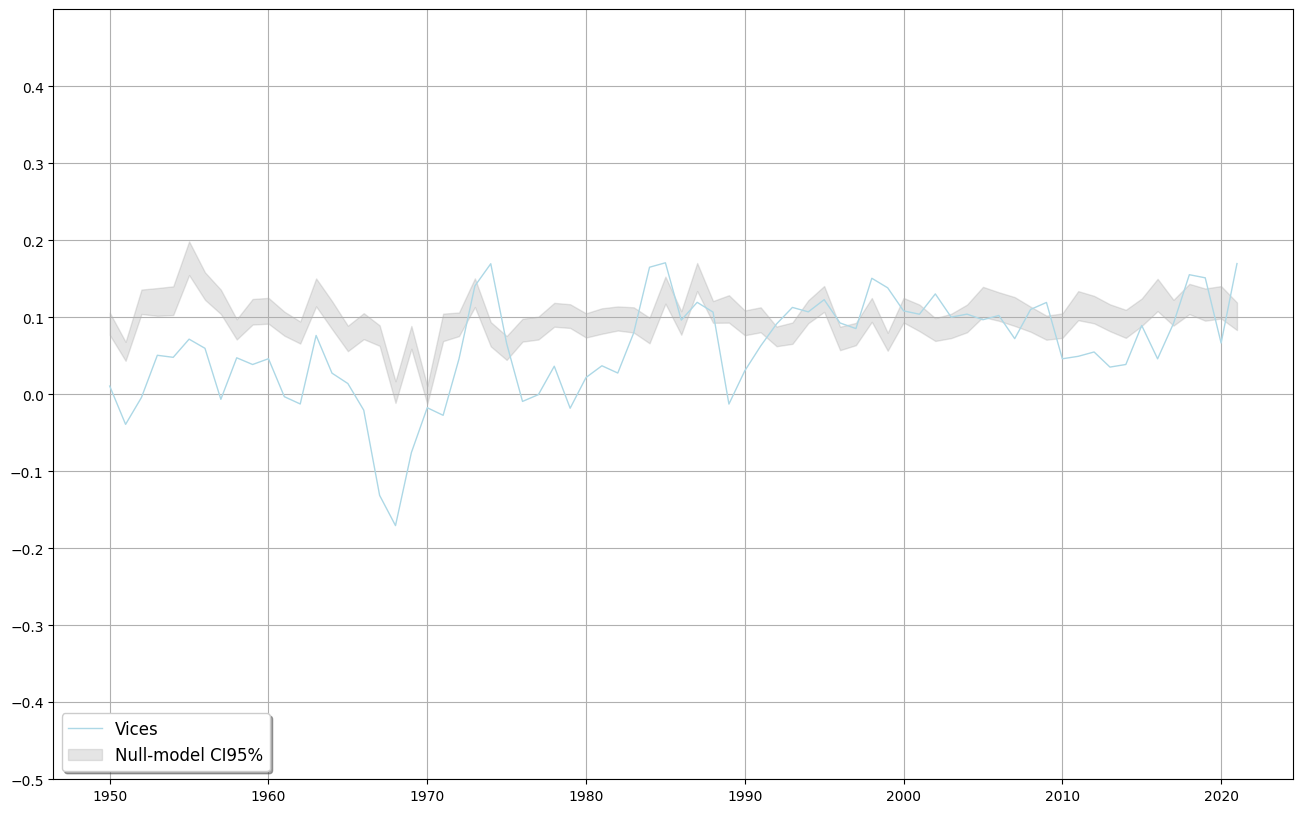

In [34]:
data1 = results
data2 = boot_df[boot_df['filename'] == 'null_vic.csv']
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.plot(data1['year'], data1['old_vice'] - data1['young_vice'], color='lightblue', lw=1, linestyle = 'solid', label='Vices')
# plot the 95% confidence interval as a grey band
ax.fill_between(data2['year'], data2['95percent_lower'], data2['95percent_upper'],
                 color='grey', alpha=0.2, label ='Null-model CI95%')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

fig.savefig(outpath+'vices.png')

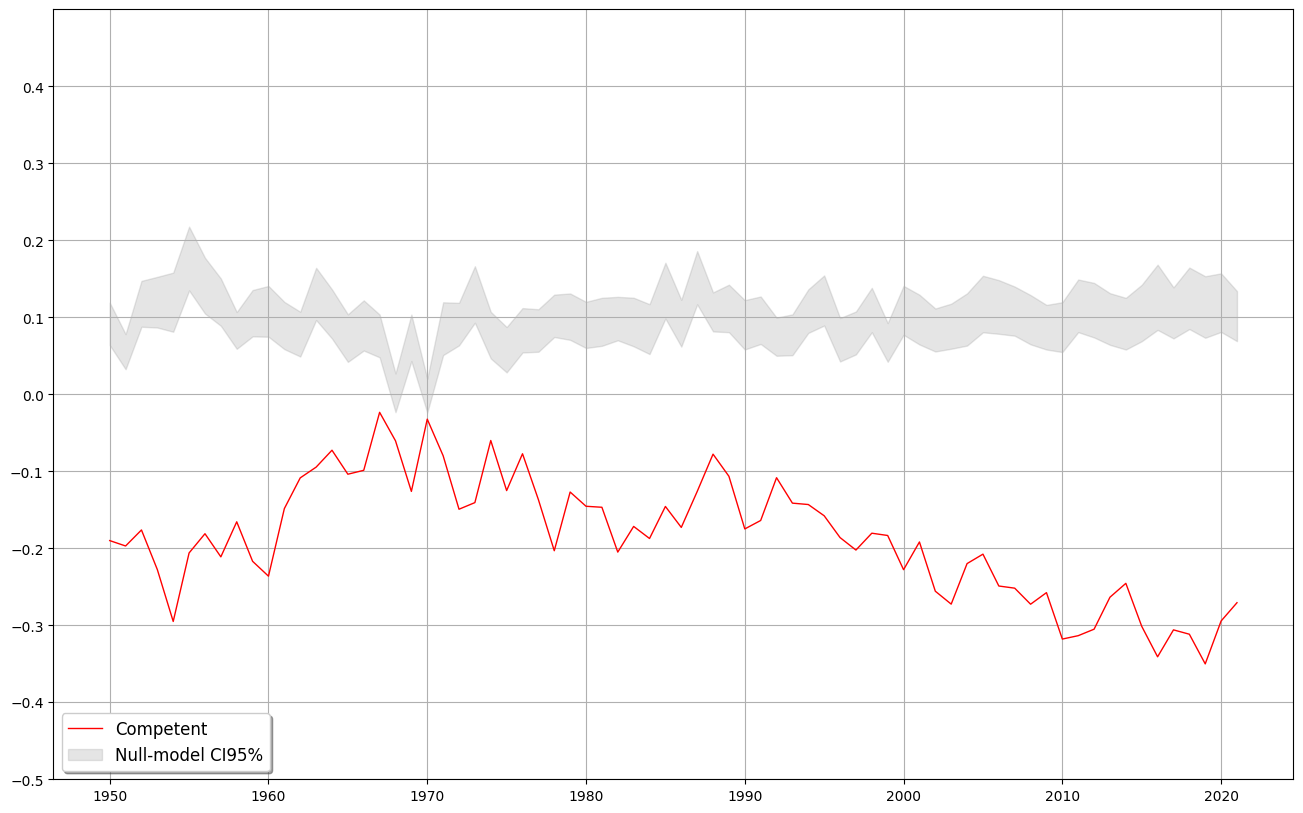

In [36]:
data1 = results
data2 = boot_df[boot_df['filename'] == 'null_comp.csv']
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.plot(data1['year'], data1['old_competent'] - data1['young_competent'], color='red', lw=1, linestyle = 'solid', label='Competent')
# plot the 95% confidence interval as a grey band
ax.fill_between(data2['year'], data2['95percent_lower'], data2['95percent_upper'],
                 color='grey', alpha=0.2, label ='Null-model CI95%')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

fig.savefig(outpath+'competent.png')

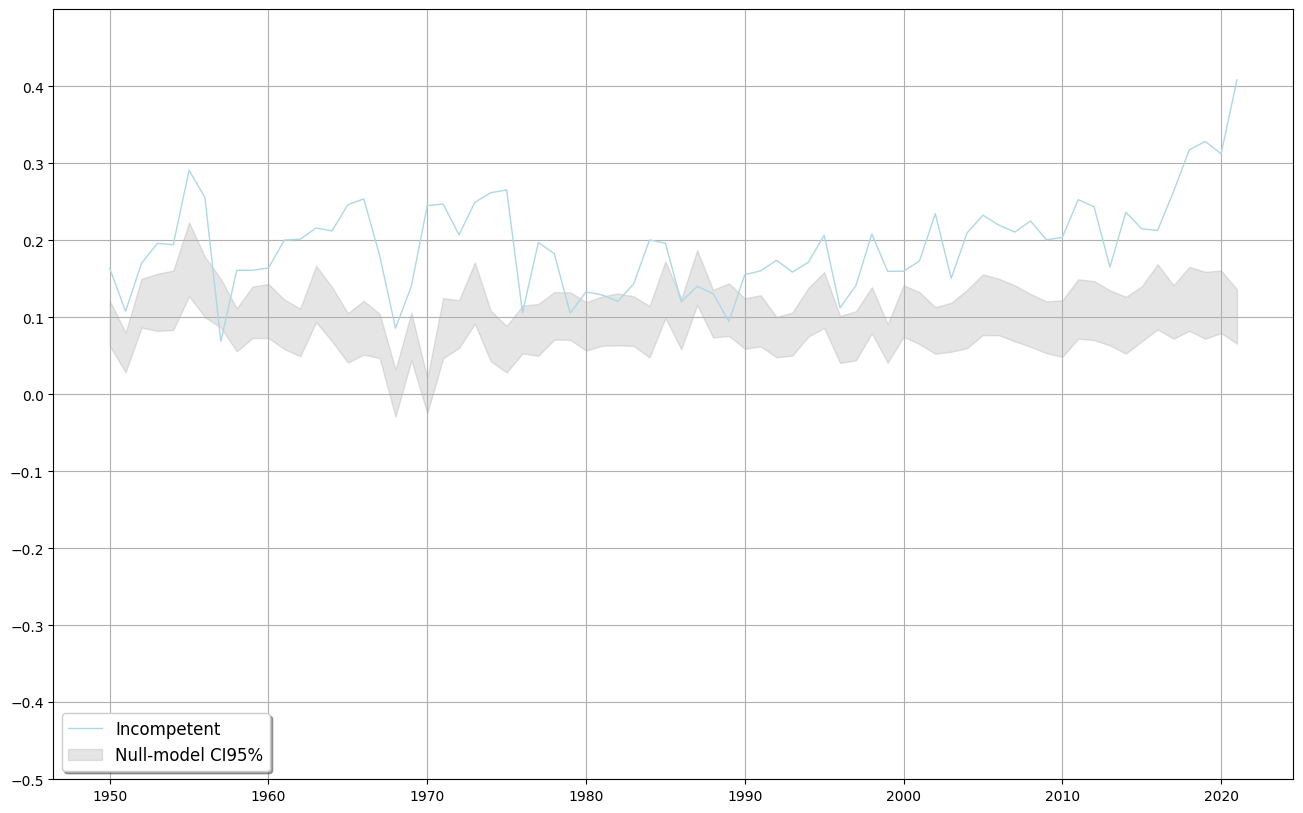

In [38]:
data1 = results
data2 = boot_df[boot_df['filename'] == 'null_incomp.csv']
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.plot(data1['year'], data1['old_incompetent'] - data1['young_incompetent'], color='lightblue', lw=1, linestyle = 'solid', label='Incompetent')
# plot the 95% confidence interval as a grey band
ax.fill_between(data2['year'], data2['95percent_lower'], data2['95percent_upper'],
                 color='grey', alpha=0.2, label ='Null-model CI95%')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

fig.savefig(outpath+'incompetent.png')

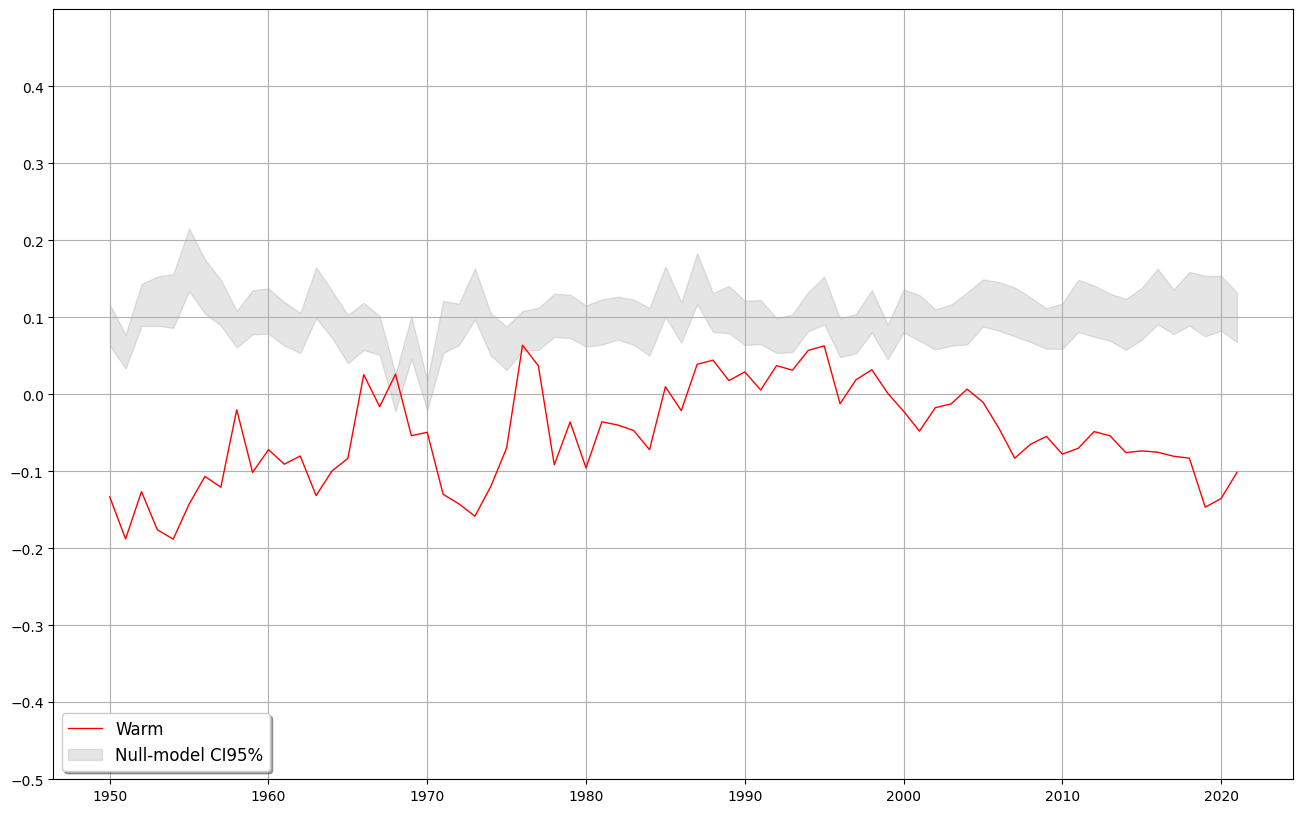

In [39]:
data1 = results
data2 = boot_df[boot_df['filename'] == 'null_warm.csv']
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.plot(data1['year'], data1['old_warm'] - data1['young_warm'], color='red', lw=1, linestyle = 'solid', label='Warm')
# plot the 95% confidence interval as a grey band
ax.fill_between(data2['year'], data2['95percent_lower'], data2['95percent_upper'],
                 color='grey', alpha=0.2, label ='Null-model CI95%')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

fig.savefig(outpath+'warm.png')

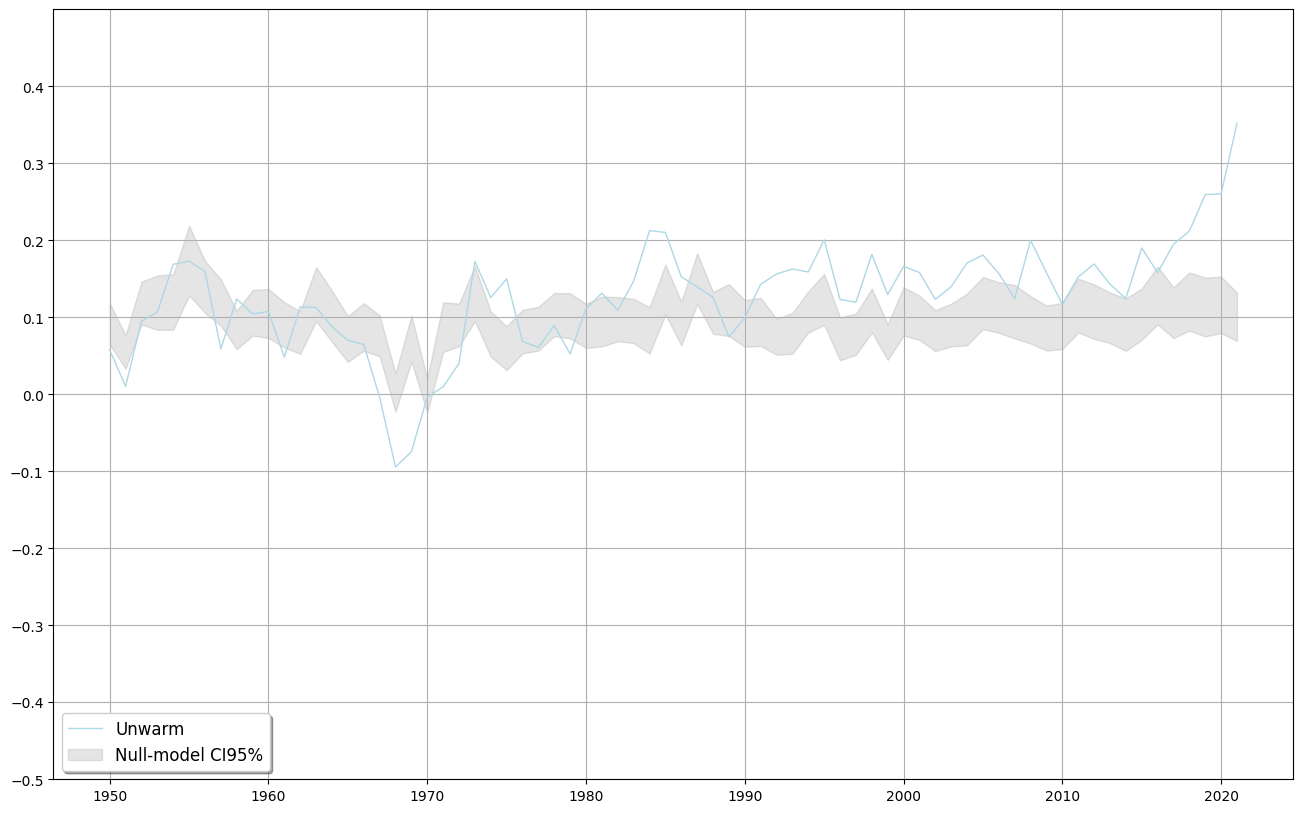

In [41]:
data1 = results
data2 = boot_df[boot_df['filename'] == 'null_unwarm.csv']
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.plot(data1['year'], data1['old_unwarm'] - data1['young_unwarm'], color='lightblue', lw=1, linestyle = 'solid', label='Unwarm')
# plot the 95% confidence interval as a grey band
ax.fill_between(data2['year'], data2['95percent_lower'], data2['95percent_upper'],
                 color='grey', alpha=0.2, label ='Null-model CI95%')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

fig.savefig(outpath+'unwarm.png')